In [15]:
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np

from romgw.config.env import PROJECT_ROOT, COMMON_TIME
from romgw.maths.rb import gram_matrix
from romgw.typing.core import RealArray, BBHSpinType, ModeType, ComponentType
from romgw.typing.utils import validate_literal
from romgw.waveform.base import ComponentWaveform, FullWaveform
from romgw.waveform.dataset import ComponentWaveformDataset, FullWaveformDataset

In [16]:
def probe_rb(
    bbh_spin: BBHSpinType,
    mode: ModeType,
    component: ComponentType,
    verbose:bool = False,
    show_element_params: bool = False,
) -> None:
    """Look into the waveforms generated by the fiducial model."""
    # ----- Validate args -----
    bbh_spin = validate_literal(bbh_spin, BBHSpinType)
    mode = validate_literal(mode, ModeType)
    component = validate_literal(component, ComponentType)

    # ----- Notebook data root -----
    data_dir = PROJECT_ROOT / "data" / bbh_spin / "train"

    # ----- Load rb elements -----
    rb_dir = data_dir / mode / component / "reduced_basis"
    elements = ComponentWaveformDataset.from_directory(rb_dir / "elements",
                                                       component=component)
    m = len(elements)
    errs = np.load(rb_dir / "rb_greedy_errors.npy", allow_pickle=False)
    if verbose:
        print(f"{elements=}")

        G = gram_matrix(elements, COMMON_TIME)
        print(f"Gram matrix:")
        diag_mean = float(np.diagonal(G).mean())
        diag_min = float(np.diagonal(G).min())
        off_diag_mean = (float(np.sum(np.sum(G))) - (len(G) * diag_mean)) / (G.size - len(G))
        off_diag_max = float((G - G*np.identity(len(G))).max())
        print(f">>> diagonal mean: {diag_mean:.6e}\n"
              f">>> diagonal min : {diag_min:.6e}\n"
              f">>> off-diag mean: {off_diag_mean:.6e}\n"
              f">>> off_diag max : {off_diag_max:.6e}")


    # ----- Visualise n waveforms -----
    fig = plt.figure(figsize=(12, 3))
    spec = gridspec.GridSpec(
        ncols=2,
        nrows=1,
        width_ratios=(5, 3),
        left=0,
        right=1,
        bottom=0,
        top=1,
        wspace=0.2
    )
    ax_elem = fig.add_subplot(spec[0])
    ax_errs = fig.add_subplot(spec[1])
    
    for e in elements:
        ax_elem.plot(COMMON_TIME, e, label=e.params)
    
    ax_errs.semilogy(range(len(errs)), errs, alpha=0.5)
    ax_errs.scatter(range(len(errs)), errs, marker='x', s=10)
    tolerance = 1e-12 if component == "amplitude" else 1e-10
    ax_errs.hlines(tolerance, *ax_errs.get_xlim(),
                   linestyle='--', alpha=0.5, color='r')
        
    ax_elem.set_xlim(-5000, 250)
    ax_elem.set_xlabel("time")
    ax_elem.set_ylabel(f"{component}")
    ax_elem.set_title(f"{m} {component} rb elements ({bbh_spin=}, {mode=})")

    ax_errs.set_xlim(0, len(errs))
    ax_errs.set_xlabel("m")
    ax_errs.set_ylabel(f"greedy error")
    ax_errs.set_title(f"greedy errors for {component} rb")

    plt.show()

    if show_element_params:
        for e in elements:
            print(e.params)

Waveforms loaded.                                                               
elements=<ComponentWaveformDataset[amplitude](n=21, L=(5250,))>
Gram matrix:
>>> diagonal mean: 1.000000e+00
>>> diagonal min : 1.000000e+00
>>> off-diag mean: 0.000000e+00
>>> off_diag max : 6.938894e-17


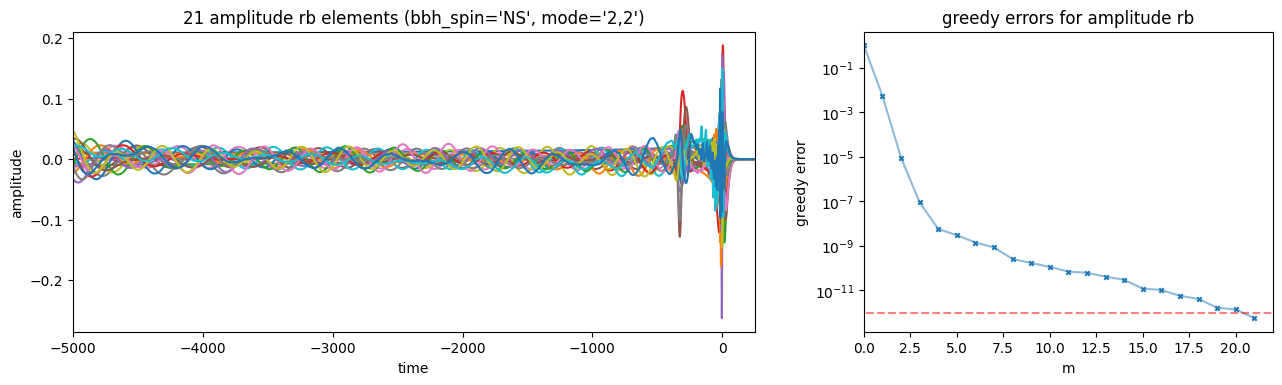

PhysicalParams(q=1.011351, chi1=[ 0.       0.       0.       ], chi2=[ 0.       0.       0.       ])
PhysicalParams(q=9.998393, chi1=[ 0.       0.       0.       ], chi2=[ 0.       0.       0.       ])
PhysicalParams(q=3.992597, chi1=[ 0.       0.       0.       ], chi2=[ 0.       0.       0.       ])
PhysicalParams(q=2.476907, chi1=[ 0.       0.       0.       ], chi2=[ 0.       0.       0.       ])
PhysicalParams(q=7.014908, chi1=[ 0.       0.       0.       ], chi2=[ 0.       0.       0.       ])
PhysicalParams(q=1.545292, chi1=[ 0.       0.       0.       ], chi2=[ 0.       0.       0.       ])
PhysicalParams(q=1.791555, chi1=[ 0.       0.       0.       ], chi2=[ 0.       0.       0.       ])
PhysicalParams(q=2.689136, chi1=[ 0.       0.       0.       ], chi2=[ 0.       0.       0.       ])
PhysicalParams(q=1.333242, chi1=[ 0.       0.       0.       ], chi2=[ 0.       0.       0.       ])
PhysicalParams(q=4.261109, chi1=[ 0.       0.       0.       ], chi2=[ 0.       0.       0.

In [19]:
probe_rb(
    bbh_spin="NS",
    mode="2,2",
    component="amplitude",
    verbose=True,
    show_element_params=True,
)